### Non Linear Model

We will run a decision tree model and assess its accuracy on our business problem

In [1]:
# Generic Imports
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Machine Learning

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
X4 = joblib.load("../data/train_df.pkl")
y4 = joblib.load("../data/y_train.pkl")

X4_test = joblib.load("../data/test_df.pkl")
y4_test = joblib.load("../data/y_test.pkl")

In [3]:
scaler = StandardScaler()

In [4]:
steps = [
    ('scaler', StandardScaler()),
    ('reduce_dim', PCA()),
    ('tree', DecisionTreeClassifier())
]

dt_pipe = Pipeline(steps)

In [5]:
fiited_pipe = dt_pipe.fit(X4,y4)


In [6]:
dt_params = {
    'reduce_dim__n_components' : [ 2, 4, 5],
    'tree__max_depth': [4, 8, 12, 16]
}



In [7]:
#grid search  for Decision Tree
decision_tree_grid = GridSearchCV(fiited_pipe, dt_params, cv=3, verbose=2, n_jobs=-1, refit=True) 

# Fit the grid search to trained data
decision_tree_grid.fit(X4, y4)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END ......reduce_dim__n_components=2, tree__max_depth=4; total time=  12.9s
[CV] END ......reduce_dim__n_components=2, tree__max_depth=4; total time=  13.8s
[CV] END ......reduce_dim__n_components=2, tree__max_depth=8; total time=  13.9s
[CV] END ......reduce_dim__n_components=2, tree__max_depth=4; total time=  14.0s
[CV] END ......reduce_dim__n_components=2, tree__max_depth=8; total time=   5.6s
[CV] END ......reduce_dim__n_components=2, tree__max_depth=8; total time=   5.9s
[CV] END .....reduce_dim__n_components=2, tree__max_depth=12; total time=   6.0s
[CV] END .....reduce_dim__n_components=2, tree__max_depth=12; total time=   6.1s
[CV] END .....reduce_dim__n_components=2, tree__max_depth=12; total time=   6.2s
[CV] END .....reduce_dim__n_components=2, tree__max_depth=16; total time=   6.0s
[CV] END .....reduce_dim__n_components=2, tree__max_depth=16; total time=   6.1s
[CV] END .....reduce_dim__n_components=2, tree__

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('reduce_dim', PCA()),
                                       ('tree', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'reduce_dim__n_components': [2, 4, 5],
                         'tree__max_depth': [4, 8, 12, 16]},
             verbose=2)

In [8]:
decision_tree_grid.best_params_

{'reduce_dim__n_components': 5, 'tree__max_depth': 8}

In [9]:
best_tree = decision_tree_grid.best_estimator_

In [10]:
from sklearn.metrics import accuracy_score

dt_accuracy_pred = best_tree.predict(X4_test)


print(f"Final Decision Tree Accuracy: {accuracy_score(dt_accuracy_pred, y4_test, 2)}")

Final Decision Tree Accuracy: 0.7756388415672913


In [11]:
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(X4, y4)

dt.score(X4,y4)

0.6060819012329904

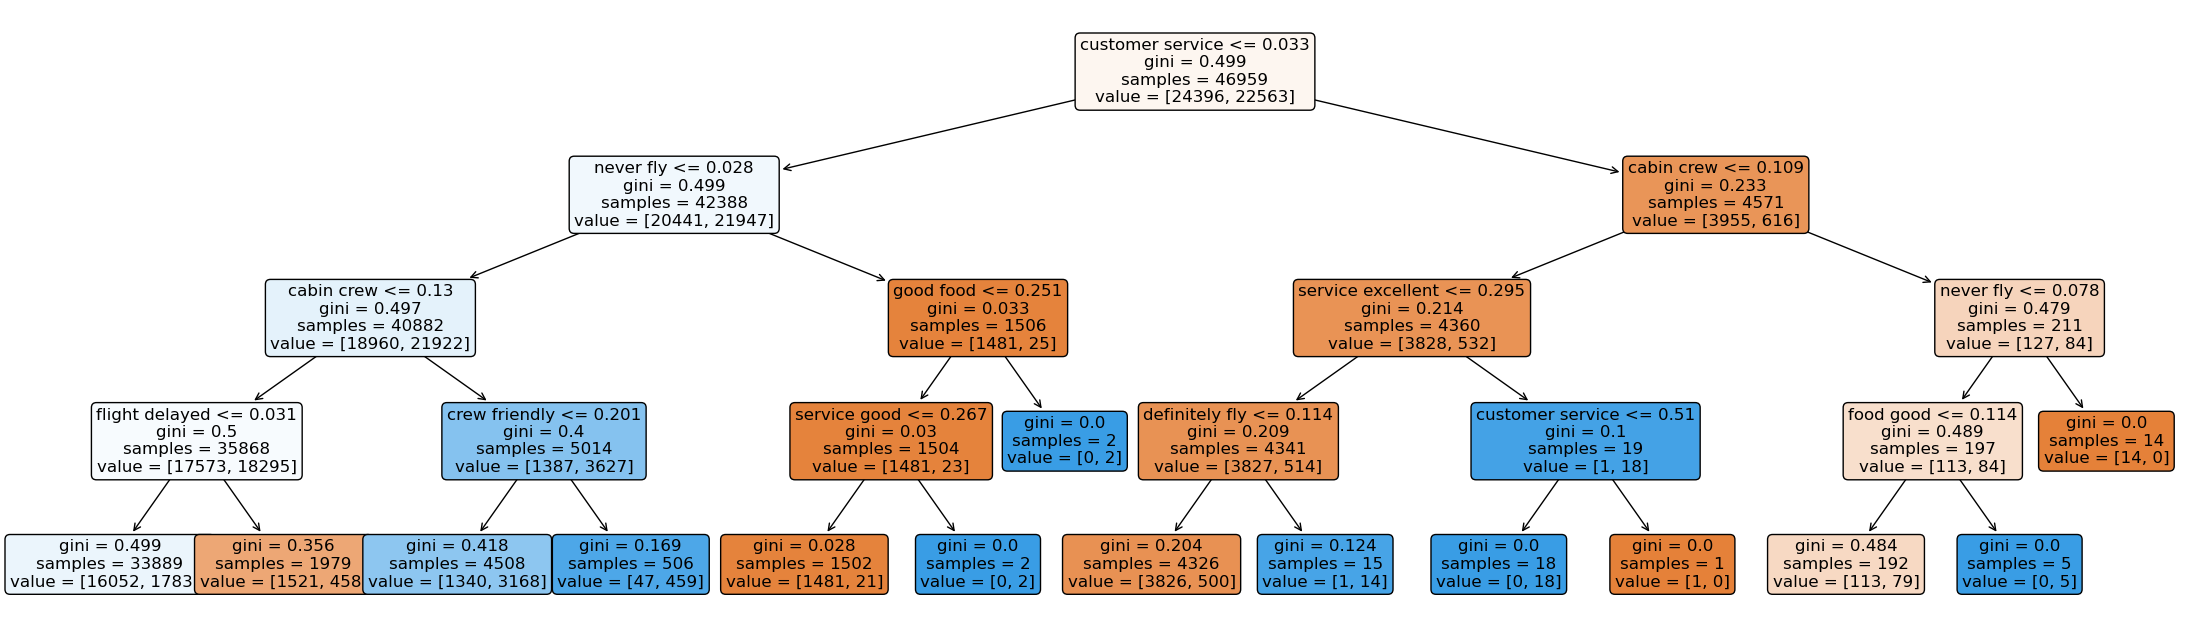

In [12]:
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(28,8))

plot_tree(dt,
          feature_names=X4_test.columns,
          rounded=True,
          impurity=True,
          filled=True,
          ax=ax,
          fontsize=12);

In [13]:
from sklearn.metrics import classification_report

dt_accuracy_pred = dt.predict(X4_test)

report_final = classification_report(y4_test, dt_accuracy_pred)
print(report_final)

              precision    recall  f1-score   support

           0       0.86      0.28      0.42      6099
           1       0.55      0.95      0.70      5641

    accuracy                           0.60     11740
   macro avg       0.71      0.62      0.56     11740
weighted avg       0.71      0.60      0.56     11740



In [14]:
joblib.dump(dt, "../Demo_App/dtclf.pkl")

['../Demo_App/dtclf.pkl']